Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [22]:
data.head(5)
data.shape

(858, 34)

In [4]:
data = data.replace('?', np.nan)
data = data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)


In [5]:
data.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


Data Processing

In [8]:
data = data.apply(pd.to_numeric)
data = data.fillna(data.mean())

In [12]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [13]:
from sklearn.feature_selection import SelectPercentile, chi2 , f_classif
FeatureSelection = SelectPercentile(score_func = chi2, percentile=30)
X = FeatureSelection.fit_transform(X,Y)

In [14]:
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)


std = StandardScaler()
X= std.fit_transform(X)

Model Training and testing

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [17]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42) 
DecisionTreeClassifierModel.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
Tree_train_score= DecisionTreeClassifierModel.score(X_train, Y_train)
Tree_test_score=   DecisionTreeClassifierModel.score(X_test, Y_test)

print(f'Using Decision Tree, the score of training data is {round(Tree_train_score*100,2)} % and the score of test data is {round(Tree_test_score*100,2)} %')

Using Decision Tree, the score of training data is 96.33 % and the score of test data is 96.12 %


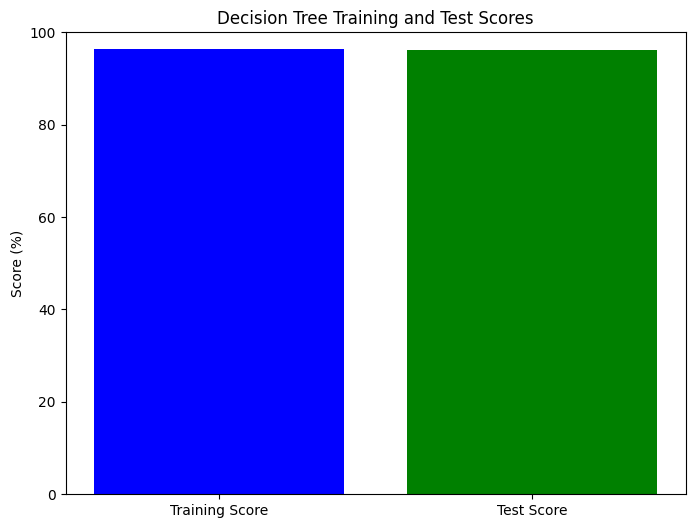

In [19]:
scores = [Tree_train_score* 100, Tree_test_score * 100]
labels = ['Training Score', 'Test Score']


plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('Decision Tree Training and Test Scores')
plt.ylim(0, 100)  
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


<Axes: >

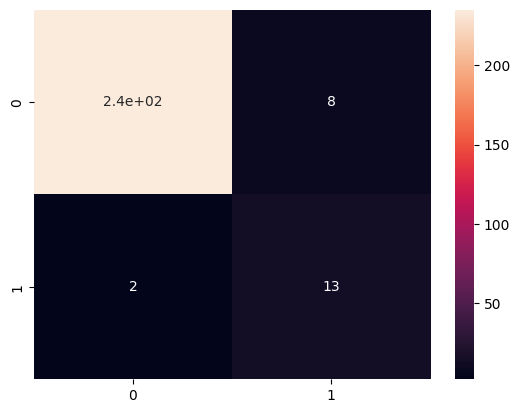

In [21]:
y_pred_logisReg = DecisionTreeClassifierModel.predict(X_test)

conf = confusion_matrix(Y_test,y_pred_logisReg )
print(y_pred_logisReg)
sns.heatmap(conf, annot= True)

save the the Model

In [27]:
import pickle


with open('my_model.pkl', 'wb') as file:
    pickle.dump(DecisionTreeClassifierModel, file)